In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pylab import *
%matplotlib inline
import numpy as np
from sklearn import datasets, linear_model
from sklearn import cross_validation

In [3]:
df_cal   = pd.read_csv("../data/serieA_1516.csv")
df_cal_2 = pd.read_csv("../data/serieA_1415.csv")
df_cal_3 = pd.read_csv("../data/serieA_1314.csv")
df_cal_4 = pd.read_csv("../data/serieA_1213.csv")
df_cal_5 = pd.read_csv("../data/serieA_1112.csv")


df_cal_2.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,I1,30/08/14,Chievo,Juventus,0,1,A,0,1,A,...,1.80,27,1.00,2.00,1.94,1.98,1.92,8.35,3.84,1.56
1,I1,30/08/14,Roma,Fiorentina,2,0,H,1,0,H,...,1.94,21,-0.75,2.00,1.95,1.98,1.92,1.73,3.80,5.56
2,I1,31/08/14,Atalanta,Verona,0,0,D,0,0,D,...,1.70,21,-0.50,2.15,2.10,1.84,1.80,2.07,3.47,3.99
3,I1,31/08/14,Cesena,Parma,1,0,H,1,0,H,...,1.59,21,0.25,1.91,1.86,2.08,2.01,5.44,3.65,1.76
4,I1,31/08/14,Genoa,Napoli,1,2,A,1,1,D,...,1.82,21,0.50,1.91,1.87,2.04,2.01,3.92,3.54,2.07
5,I1,31/08/14,Milan,Lazio,3,1,H,1,0,H,...,1.79,20,-0.50,2.05,2.00,1.90,1.87,2.13,3.18,4.28
6,I1,31/08/14,Palermo,Sampdoria,1,1,D,1,0,H,...,1.65,21,-0.25,1.96,1.89,2.03,1.98,2.26,3.29,3.64
7,I1,31/08/14,Sassuolo,Cagliari,1,1,D,1,1,D,...,2.10,21,0.00,1.72,1.67,2.36,2.25,2.03,3.71,3.89
8,I1,31/08/14,Torino,Inter,0,0,D,0,0,D,...,1.77,21,0.00,2.38,2.28,1.72,1.66,2.77,3.34,2.78
9,I1,31/08/14,Udinese,Empoli,2,0,H,0,0,D,...,1.74,21,-0.75,2.10,2.05,1.87,1.83,1.77,3.69,5.48


In [4]:
def get_teams(df):
    
    teams = []
    
    for i,cal in enumerate(df.iterrows()):
        teams.append(cal[1]["HomeTeam"])
        teams.append(cal[1]["AwayTeam"])

        if i == 9: 
            return teams


In [5]:
teams_a  = get_teams(df_cal)
teams_a2 = get_teams(df_cal_2)
teams_a3 = get_teams(df_cal_3)
teams_a4 = get_teams(df_cal_4)
teams_a5 = get_teams(df_cal_5)

print teams_a2
print teams_a3
print teams_a4
print teams_a5


['Chievo', 'Juventus', 'Roma', 'Fiorentina', 'Atalanta', 'Verona', 'Cesena', 'Parma', 'Genoa', 'Napoli', 'Milan', 'Lazio', 'Palermo', 'Sampdoria', 'Sassuolo', 'Cagliari', 'Torino', 'Inter', 'Udinese', 'Empoli']
['Sampdoria', 'Juventus', 'Verona', 'Milan', 'Cagliari', 'Atalanta', 'Inter', 'Genoa', 'Lazio', 'Udinese', 'Livorno', 'Roma', 'Napoli', 'Bologna', 'Parma', 'Chievo', 'Torino', 'Sassuolo', 'Fiorentina', 'Catania']
['Fiorentina', 'Udinese', 'Juventus', 'Parma', 'Atalanta', 'Lazio', 'Chievo', 'Bologna', 'Genoa', 'Cagliari', 'Milan', 'Sampdoria', 'Palermo', 'Napoli', 'Pescara', 'Inter', 'Roma', 'Catania', 'Siena', 'Torino']
['Milan', 'Lazio', 'Cesena', 'Napoli', 'Catania', 'Siena', 'Chievo', 'Novara', 'Fiorentina', 'Bologna', 'Genoa', 'Atalanta', 'Juventus', 'Parma', 'Lecce', 'Udinese', 'Palermo', 'Inter', 'Roma', 'Cagliari']


**Definition of features**

In [6]:
def build_features(df, teams):

    team_features = []
    
    for team in teams:
        #print team_a
        team_home = df[df['HomeTeam']==team]
        team_away = df[df['AwayTeam']==team]
        
        #shots made
        team_s    = team_away["AS"].sum()  + team_home["HS"].sum()
        #shots on-target made
        team_st   = team_away["AST"].sum() + team_home["HST"].sum()
        #shots conceded
        team_sc    = team_away["HS"].sum()  + team_home["AS"].sum()
        #shots on-target conceded
        team_stc   = team_away["HST"].sum() + team_home["AST"].sum()
        #corners awarded
        team_c    = team_away["AC"].sum()  + team_home["HC"].sum()
        #corners conceded
        team_cc    = team_away["HC"].sum()  + team_home["AC"].sum()

        team_features.append([team_s,team_sc,team_st,team_stc,team_c,team_cc])

    return team_features
    

In [7]:
def build_target(df, teams):

    team_target = []
    
    for team in teams:
        #print team_a
        t      = df[(df['HomeTeam']==team) | (df['AwayTeam']==team)]
        team_home = df[df['HomeTeam']==team]
        team_away = df[df['AwayTeam']==team]

        team_h_win = len(team_home[team_home['FTHG']>team_home['FTAG']])
        team_a_win = len(team_away[team_away['FTAG']>team_away['FTHG']])
        team_draw = len(t[t['FTAG']==t['FTHG']])

        team_points = 3*team_a_win + 3*team_h_win + team_draw
        team_target.append(team_points)

    return team_target


In [8]:
feat_test = build_features(df_cal,teams_a)
targ_test = build_target(df_cal,teams_a)

print len(feat_test)
print len(targ_test)

print feat_test
print targ_test

20
20
[[511.0, 418.0, 147.0, 153.0, 243.0, 168.0], [387.0, 469.0, 114.0, 156.0, 184.0, 232.0], [451.0, 519.0, 142.0, 182.0, 209.0, 224.0], [585.0, 428.0, 216.0, 148.0, 236.0, 184.0], [477.0, 531.0, 148.0, 164.0, 169.0, 195.0], [423.0, 591.0, 129.0, 177.0, 156.0, 232.0], [573.0, 342.0, 180.0, 114.0, 208.0, 137.0], [550.0, 454.0, 173.0, 143.0, 230.0, 172.0], [486.0, 770.0, 124.0, 228.0, 170.0, 285.0], [471.0, 446.0, 176.0, 146.0, 181.0, 166.0], [516.0, 466.0, 167.0, 153.0, 245.0, 200.0], [454.0, 471.0, 137.0, 157.0, 190.0, 197.0], [599.0, 340.0, 215.0, 95.0, 212.0, 107.0], [444.0, 524.0, 145.0, 169.0, 192.0, 189.0], [412.0, 603.0, 122.0, 201.0, 164.0, 227.0], [468.0, 514.0, 149.0, 171.0, 197.0, 195.0], [430.0, 598.0, 152.0, 207.0, 172.0, 271.0], [426.0, 507.0, 132.0, 170.0, 178.0, 232.0], [486.0, 473.0, 153.0, 142.0, 202.0, 216.0], [656.0, 341.0, 243.0, 88.0, 224.0, 133.0]]
[54, 42, 28, 80, 46, 50, 64, 57, 31, 45, 67, 45, 91, 39, 39, 46, 40, 38, 61, 82]


In [9]:
features = build_features(df_cal,teams_a) + build_features(df_cal_2,teams_a2) + build_features(df_cal_3,teams_a3) + build_features(df_cal_4,teams_a4) + build_features(df_cal_5,teams_a5)

target  = build_target(df_cal,teams_a) + build_target(df_cal_2,teams_a2) + build_target(df_cal_3,teams_a3) + build_target(df_cal_4,teams_a4) + build_target(df_cal_5,teams_a5)

print features
print target

[[511.0, 418.0, 147.0, 153.0, 243.0, 168.0], [387.0, 469.0, 114.0, 156.0, 184.0, 232.0], [451.0, 519.0, 142.0, 182.0, 209.0, 224.0], [585.0, 428.0, 216.0, 148.0, 236.0, 184.0], [477.0, 531.0, 148.0, 164.0, 169.0, 195.0], [423.0, 591.0, 129.0, 177.0, 156.0, 232.0], [573.0, 342.0, 180.0, 114.0, 208.0, 137.0], [550.0, 454.0, 173.0, 143.0, 230.0, 172.0], [486.0, 770.0, 124.0, 228.0, 170.0, 285.0], [471.0, 446.0, 176.0, 146.0, 181.0, 166.0], [516.0, 466.0, 167.0, 153.0, 245.0, 200.0], [454.0, 471.0, 137.0, 157.0, 190.0, 197.0], [599.0, 340.0, 215.0, 95.0, 212.0, 107.0], [444.0, 524.0, 145.0, 169.0, 192.0, 189.0], [412.0, 603.0, 122.0, 201.0, 164.0, 227.0], [468.0, 514.0, 149.0, 171.0, 197.0, 195.0], [430.0, 598.0, 152.0, 207.0, 172.0, 271.0], [426.0, 507.0, 132.0, 170.0, 178.0, 232.0], [486.0, 473.0, 153.0, 142.0, 202.0, 216.0], [656.0, 341.0, 243.0, 88.0, 224.0, 133.0], [458.0, 579.0, 138.0, 161.0, 165.0, 243.0], [603.0, 399.0, 202.0, 101.0, 221.0, 161.0], [523.0, 392.0, 176.0, 118.0, 224.

[ 521.  496.  638.  447.  468.  512.  523.  589.  516.  511.  486.  449.
  574.  499.  440.  477.  608.  469.  599.  543.  413.  496.  357.  459.
  461.  468.  521.  498.  471.  511.  454.  375.  386.]
[61 29 72 50 39 42 70 80 67 54 61 52 78 56 42 46 62 56 91 69 36 46 24 54 47
 46 45 43 45 32 45 44 44]
67
67
('scores', array([ 0.78246444,  0.60190486,  0.79417064,  0.77706149]))
scores average 0.74
scores variance 0.08
('Coefficients: \n', array([-0.02546809,  0.02489309,  0.3226171 , -0.25791921, -0.07619675,
       -0.08198101]))
Variance score: 0.639131


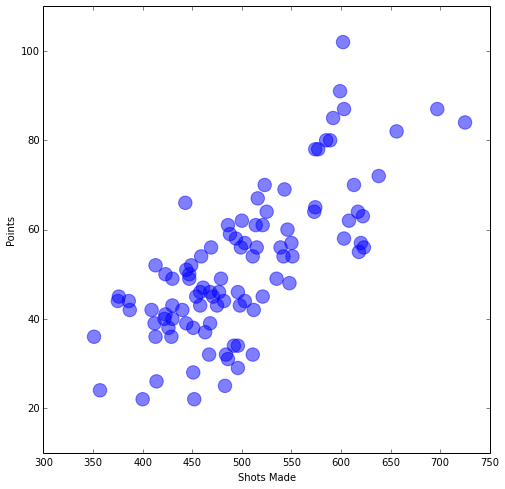

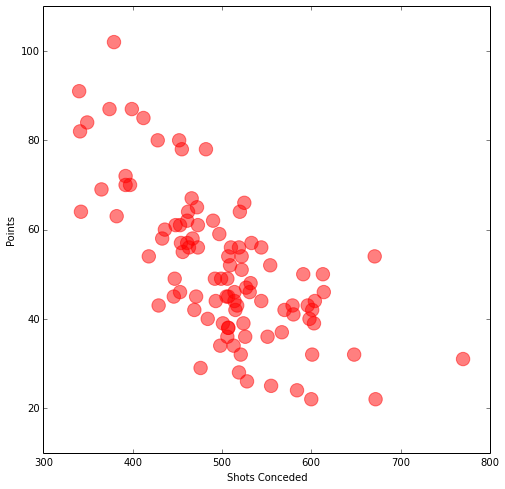

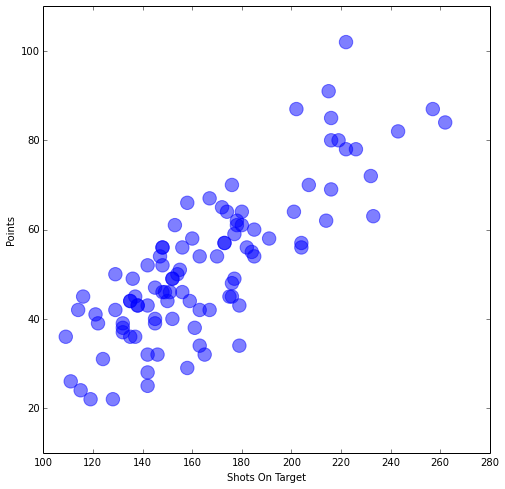

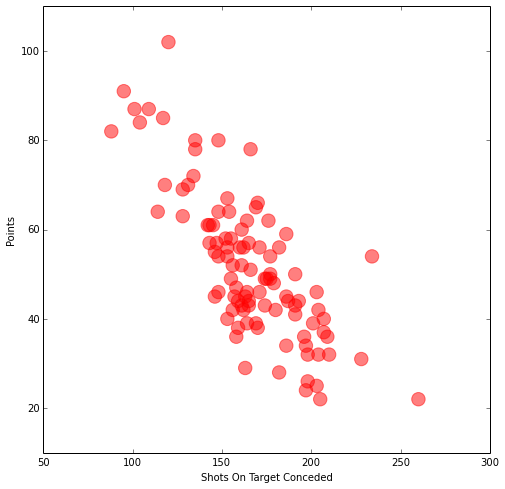

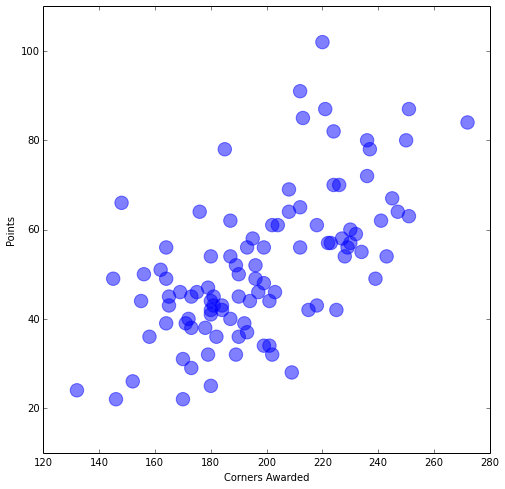

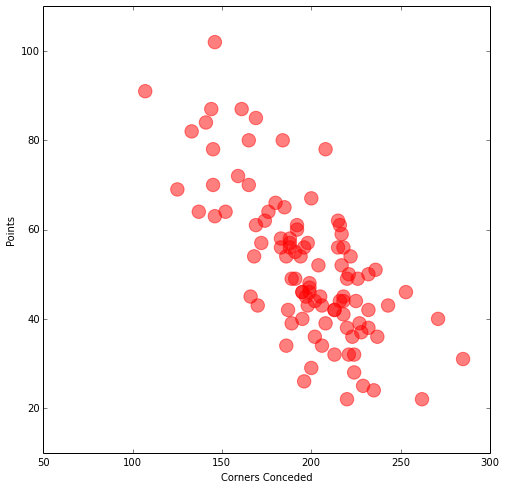

In [29]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

print np.array(X_test)[:,0]
print np.array(y_test)[:]

# Create linear regression object
regr = linear_model.LinearRegression()

print len(X_train)
print len(y_train)
# Train the model using the training sets
regr.fit(X_train, y_train)

scores = cross_validation.cross_val_score(regr, features, target,cv=4)
print("scores", scores)
print("scores average %.2f" %np.mean(scores))
print("scores variance %.2f" %np.std(scores))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
#print("Residual sum of squares: %.2f"
#      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.6f' % regr.score(X_test, y_test))


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,0], target,  color='b',s=180,alpha=0.5)

xlabel('Shots Made')
ylabel('Points')

plt.show()

# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,1], target,  color='r',s=180,alpha=0.5)

xlabel('Shots Conceded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,2], target,  color='b',s=180,alpha=0.5)

xlabel('Shots On Target')
ylabel('Points')

plt.show()

# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,3], target,  color='r',s=180,alpha=0.5)

xlabel('Shots On Target Conceded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,4], target,  color='b',s=180,alpha=0.5)

xlabel('Corners Awarded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,5], target,  color='r',s=180,alpha=0.5)

xlabel('Corners Conceded')
ylabel('Points')
